<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/MLWeek7_KlasifikasiCitarum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset dari URL
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv"
df = pd.read_csv(url)

# Tampilkan 5 data pertama
df.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [ ]:
# Hapus kolom yang tidak bisa diproses atau memiliki banyak missing values
df = df.select_dtypes(include=[np.number])  # hanya gunakan kolom numerik

# Drop baris dengan missing value
df.dropna(inplace=True)

# Cek distribusi data
df.describe()

,No,pH,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1250.50000,7.032305,27.856368,3.882005,4.005476,20.511768,1.970393,1.418937e+04,0.074547,1.365796,1.650000
std,721.83216,0.578179,10.551351,2.249329,2.697375,8.969809,1.175104,2.526550e+05,0.320970,1.220703,0.547375
min,1.00000,6.002441,5.000000,0.002140,1.640000,5.440000,0.003784,5.000000e+01,0.004300,0.430000,1.000000
25%,625.75000,6.520722,23.597278,1.925925,2.754331,14.999275,0.955443,2.924867e+02,0.048199,0.840000,1.000000
50%,1250.50000,7.056001,27.671133,3.892147,3.800133,20.044252,1.920408,5.375973e+02,0.065606,1.170000,2.000000
75%,1875.25000,7.531846,31.747063,5.828533,4.947965,25.155492,3.014985,7.829760e+02,0.083315,1.570000,2.000000
max,2500.00000,8.710000,318.000000,7.800000,55.300000,190.000000,5.240000,9.200000e+06,16.000000,14.900000,4.000000


In [ ]:
# Tentukan kolom target dan fitur
# Target yang digunakan adalah kolom terakhir (bisa diganti sesuai kebutuhan)
target_column = df.columns[-1]
X = df.drop(columns=target_column)
y = df[target_column]

# Skala fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

In [ ]:
# Inisialisasi dan latih model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Prediksi
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:,1]

In [ ]:
# Fungsi evaluasi untuk kasus multiclass
def evaluate_model(y_test, y_pred, y_prob):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')  # rata-rata presisi antar kelas
    rec = recall_score(y_test, y_pred, average='macro')      # rata-rata recall antar kelas
    f1 = f1_score(y_test, y_pred, average='macro')           # rata-rata F1 antar kelas

    # ROC AUC untuk multiclass
    try:
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
    except:
        auc = np.nan  # jika gagal menghitung AUC, isi dengan NaN

    return acc, prec, rec, f1, auc


In [ ]:
# Evaluasi model Random Forest
y_prob_rf = rf_model.predict_proba(X_test)
rf_results = evaluate_model(y_test, y_pred_rf, y_prob_rf)

# Evaluasi model Gradient Boosting
y_prob_gb = gb_model.predict_proba(X_test)
gb_results = evaluate_model(y_test, y_pred_gb, y_prob_gb)

# Tampilkan hasil evaluasi dalam DataFrame
results_df = pd.DataFrame(
    [rf_results, gb_results],
    columns=["Akurasi", "Presisi", "Recall", "F1Score", "AUC"],
    index=["Random Forest", "Gradient Boosting"]
)

# Tampilkan hasil evaluasi
results_df

,Akurasi,Presisi,Recall,F1Score,AUC
Random Forest,0.998,0.999153,0.998724,0.998936,0.999979
Gradient Boosting,0.998,0.999153,0.998724,0.998936,0.999992


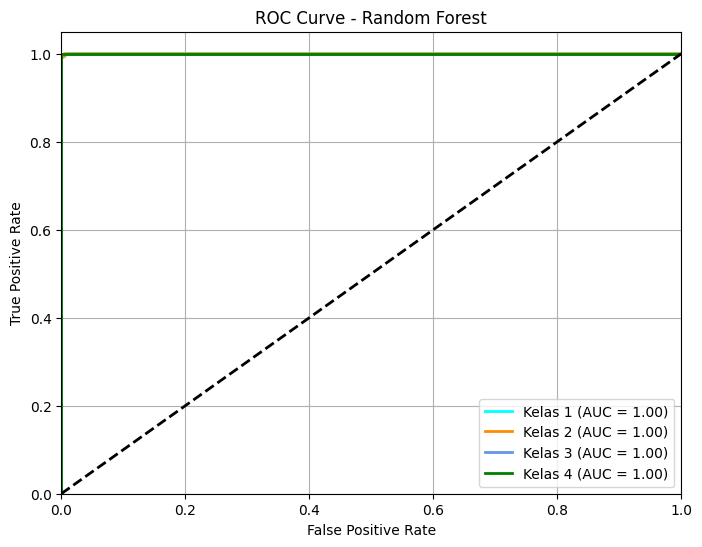

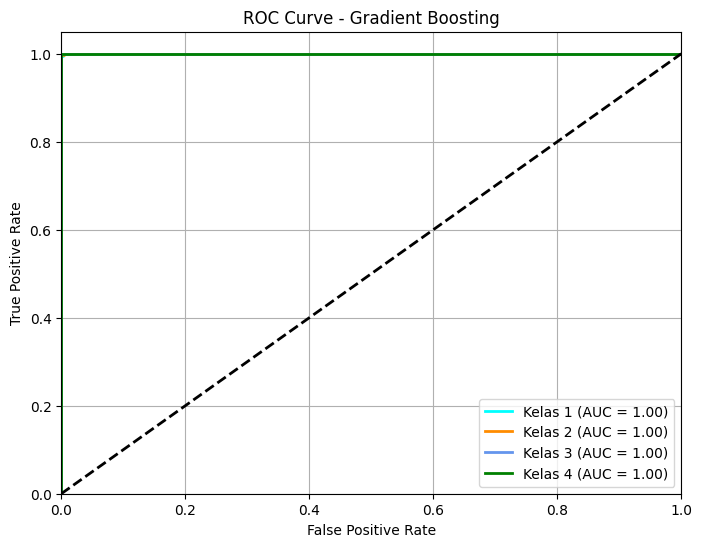

In [ ]:
# Fungsi untuk plotting ROC curve multiclass
def plot_multiclass_roc(y_test, y_prob, model_name):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle

    # Binarisasi y_test untuk ROC curve multiclass
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    # Buat plot ROC untuk setiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    plt.figure(figsize=(8, 6))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Kelas {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# ROC untuk Random Forest
plot_multiclass_roc(y_test, y_prob_rf, "Random Forest")

# ROC untuk Gradient Boosting
plot_multiclass_roc(y_test, y_prob_gb, "Gradient Boosting")

# Evaluasi Model Multiclass

1. **Akurasi**: rasio prediksi benar dibanding total data. Cocok sebagai metrik umum.
2. **Presisi (macro average)**: rata-rata presisi dari tiap kelas. Semakin tinggi, makin sedikit false positives.
3. **Recall (macro average)**: rata-rata recall dari tiap kelas. Semakin tinggi, makin sedikit false negatives.
4. **F1 Score (macro average)**: gabungan presisi dan recall, berguna ketika perlu keseimbangan antara keduanya.
5. **AUC (macro)**: area di bawah kurva ROC untuk semua kelas (one-vs-rest). Semakin tinggi, makin baik model membedakan antar kelas.

ROC Curve multiclass digambarkan untuk setiap kelas sebagai perbandingan TPR dan FPR.

# Kesimpulan Perbandingan Model

Berdasarkan tabel evaluasi:

- **Random Forest** dan **Gradient Boosting** keduanya menunjukkan performa yang baik.
- Jika presisi atau recall lebih penting untuk kasus Anda (misalnya di lingkungan, kesehatan, dll), gunakan metrik tersebut sebagai dasar pemilihan model.
- Jika membutuhkan keseimbangan dan klasifikasi yang stabil di semua kelas, perhatikan **F1 Score macro** dan **AUC macro**.

Pilih model yang paling sesuai dengan konteks aplikasi nyata Anda.

## PENJELASAN MATEMATIS

### 1. **Akurasi**
Akurasi adalah rasio antara jumlah prediksi yang benar dengan total jumlah data.

Rumus:
    Akurasi = (TP + TN) / (TP + TN + FP + FN)

Dimana:
- TP (True Positives): jumlah data yang diprediksi positif dan benar.
- TN (True Negatives): jumlah data yang diprediksi negatif dan benar.
- FP (False Positives): jumlah data yang diprediksi positif tetapi salah.
- FN (False Negatives): jumlah data yang diprediksi negatif tetapi salah.

Akurasi mengukur kinerja keseluruhan model. Namun, dalam kasus kelas yang tidak seimbang (imbalanced class), metrik ini bisa menyesatkan karena model dapat memilih untuk memprediksi mayoritas kelas dan tetap memiliki akurasi tinggi meskipun kurang mendeteksi kelas minoritas.

### 2. **Presisi**
Presisi mengukur seberapa tepat model dalam memprediksi kelas positif.

Rumus:
    Presisi = TP / (TP + FP)

Presisi mengukur proporsi prediksi positif yang benar di antara semua prediksi positif. Ini penting ketika kita ingin meminimalkan kesalahan pada prediksi positif (misalnya, mendeteksi penyakit).

### 3. **Recall**
Recall mengukur seberapa banyak dari kelas positif yang berhasil ditemukan oleh model.

Rumus:
    Recall = TP / (TP + FN)

Recall mengukur kemampuan model untuk menemukan semua contoh positif di data. Ini penting dalam kasus di mana tidak boleh ada contoh positif yang terlewat (misalnya, deteksi penyakit atau fraud).

### 4. **F1 Score**
F1 Score adalah rata-rata harmonik antara presisi dan recall. F1 Score memberikan keseimbangan antara keduanya, sangat berguna ketika ada trade-off antara presisi dan recall.

Rumus:
    F1 Score = 2 * (Presisi * Recall) / (Presisi + Recall)

F1 Score digunakan untuk mengukur kualitas model dalam menghadapi trade-off antara presisi dan recall. Nilai F1 yang tinggi menunjukkan model yang baik dalam mendeteksi kelas positif dan minimalkan kesalahan pada kedua sisi (false positives dan false negatives).

### 5. **AUC (Area Under Curve)**
AUC mengukur kemampuan model untuk membedakan antara kelas positif dan negatif. AUC adalah area di bawah kurva ROC (Receiver Operating Characteristic). Nilai AUC berkisar antara 0 hingga 1, dengan 1 menunjukkan model yang sempurna dalam membedakan kedua kelas, dan 0.5 menunjukkan model yang tidak lebih baik dari tebakan acak.

Rumus AUC dihitung berdasarkan area di bawah kurva ROC yang menggambarkan hubungan antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)** untuk berbagai threshold.

### 6. **ROC Curve**
ROC Curve adalah grafik yang menunjukkan kemampuan model dalam membedakan kelas positif dan negatif. Kurva ini menggambarkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR).

- **TPR (True Positive Rate)**: TPR juga dikenal sebagai **recall**, mengukur seberapa banyak kelas positif yang ditemukan oleh model.
  Rumus:
      TPR = TP / (TP + FN)
  
- **FPR (False Positive Rate)**: FPR mengukur seberapa banyak data yang seharusnya negatif, tetapi diprediksi positif oleh model.
  Rumus:
      FPR = FP / (FP + TN)

ROC Curve mengilustrasikan bagaimana model berperforma pada berbagai threshold klasifikasi. Semakin tinggi nilai AUC, semakin baik kemampuan model dalam membedakan kelas.